# Mod 1 Practice Code NoteBook
#### Robert Fustero

In [1]:
players = {
    'L. Messi': {
		'age': 31,
		'nationality': 'Argentina',
		'teams': ['Barcelona']
	},
	'Cristiano Ronaldo': {
		'age': 33,
		'nationality': 'Portugal',
		'teams': ['Juventus', 'Real Madrid', 'Manchester United']
	},
	'Neymar Jr': {
		'age': 26,
		'nationality': 'Brazil',
		'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
	},
	'De Gea': {
		'age': 27,
		'nationality': 'Spain',
		'teams': ['Atletico Madrid', 'Manchester United']
	},
	'K. De Bruyne': {
		'age': 27,
		'nationality': 'Belgium',
		'teams': ['Chelsea', 'Manchester City']
	}
}

### 1) Create a list of all the keys in the players dictionary. Use python's documentation on dictionaries for help if needed. Store the list of player names in a variable called player_names to use in the next question.

In [4]:
player_names = list(players.keys())

In [5]:
print(player_names)

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']


### 2) Great! Now that we have each players name, let's use that information to create a list of tuples containing each player's name along with their nationality. Store the list in a variable called player_nationalities

In [9]:
player_nationalities =[]
for x in player_names:
    player_nationalities.append((x,players[x]['nationality']))
print(player_nationalities)

[('L. Messi', 'Argentina'), ('Cristiano Ronaldo', 'Portugal'), ('Neymar Jr', 'Brazil'), ('De Gea', 'Spain'), ('K. De Bruyne', 'Belgium')]


### 3) Now, define a function called get_players_on_team that returns a list of the names of all the players who have played on a given team.

In [19]:
def get_players_on_team(players, team):
    pn = []
    for i in list(players.keys()):
        if team in players[i]['teams']:
            pn.append(i)
    return pn

In [20]:
players_on_manchester_united = get_players_on_team(players,'Manchester United')
print(players_on_manchester_united)

['Cristiano Ronaldo', 'De Gea']


### 1) Read the CSV file into a pandas dataframe

#### The data you'll be working with is found in a file called './data/fifa.csv'. Use your knowledge of pandas to create a new dataframe using the csv data.


In [130]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data.csv')

In [131]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2. Drop n/a rows for "Release Clause"

#### Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining.

In [132]:
df = df.dropna(subset=['Release Clause'])

In [133]:
len(df['Release Clause'])

16643

### 3) Convert the Release Clause Price from Euros to Dollars

#### Now that there are no n/a values, we can change the values in the Release Clause column from Euro to Dollar amounts.

#### Assume the current Exchange Rate is 1 Euro = 1.2 Dollars

In [21]:
def euro_to_dollar(stringy):
    '''Covert Euro To Dollar - Seperates out first & last char value - converts - then adds $ to M 
    (limits string to 5 chars)'''
    return '$'+str(float((stringy[1:-1]))*1.2)[0:5]+'M'

In [22]:
df['Release Clause']=df['Release Clause'].apply(euro_to_dollar)

In [25]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,$271.8M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,$152.5M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,$273.7M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,$166.3M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,$235.6M


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Find the top 10 countries with the most players (using the 'Nationality' column). Create a bar chart showing the number of players in those 10 countries

In [67]:
def Nmaxelements(list1, N): 
    final_list = [] 
  
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                  
        list1.remove(max1); 
        final_list.append(max1) 
          
    return(final_list)

In [60]:
Nat={}
for x in list(np.unique(df.Nationality)):
    Nat[x] = len(df[df.Nationality==x])

In [70]:
maxcountriesN = Nmaxelements((list(Nat.values())),10)

In [92]:
maxcountries = []
for x in maxcountriesN:
    for i in list(np.unique(df.Nationality)): 
        if Nat[i] == x:
            maxcountries.append(i)  
print(maxcountries)

['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy', 'Colombia', 'Japan', 'Netherlands']


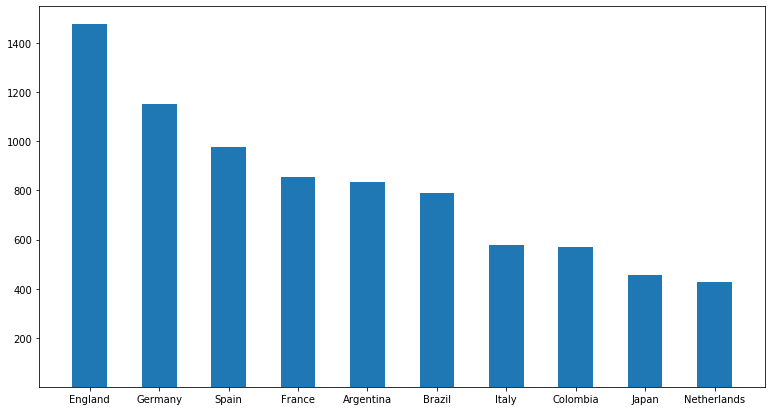

In [90]:
fig = plt.figure(figsize=(13,7))
plt.bar(maxcountries, maxcountriesN, .5, .6, align='center');
plt.xticks(range(len(maxcountries)), maxcountries);

### 2) Below is a scatter plot for the player stats StandingTackle and SlidingTackle

#### How would you describe the relationship between these two features.

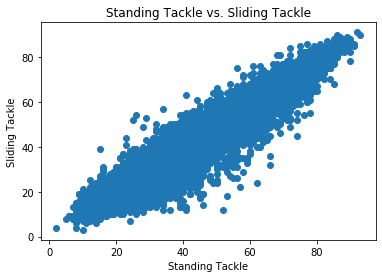

In [91]:
plt.scatter(df['StandingTackle'], df['SlidingTackle'])
plt.title('Standing Tackle vs. Sliding Tackle')
plt.xlabel('Standing Tackle')
plt.ylabel('Sliding Tackle')
plt.show()

There seems to be a somewhat linear relationship between Standing and Sliding Tackles - Perhaps a ridge regression model would work best due to the slight curvature in the ditribution

### 1) What are the mean age and the median age for the players in this dataset?

#### In your own words, how are the mean and median related to each other and what do these values tell us about the distribution of the variable 'Age'

In [96]:
print(np.mean(df.Age), np.median(df.Age))

25.226221234152497 25.0


The mean and median are similar in this data set which isnt surprising since a variable like age is usually normally distributed in a sample

### 2) Who is the oldest player in Argentina and how old is he?

In [134]:
print(df.loc[(df.Nationality == 'Argentina') & (df.Age == max(df[(df.Nationality == 'Argentina')].Age))]['Name'])
print('Age: ' +str(max(df[(df.Nationality == 'Argentina')].Age)))

7225    C. Muñoz
Name: Name, dtype: object
Age: 41


oldest player is C. Muñoz and he's 41